## Pytorch Dependencies

In [2]:
!nvidia-smi

Thu Sep 25 10:17:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 581.15                 Driver Version: 581.15         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060      WDDM  |   00000000:01:00.0  On |                  N/A |
|  0%   38C    P8             18W /  170W |     780MiB /  12288MiB |     28%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
import torch
print(torch.__version__)

2.8.0+cu126


## Intro to Tensors
### Creat tensor

In [4]:
# Scalar
scalar = torch.tensor(42)
print(scalar)
print(scalar.ndim)
print(scalar.item()) # Get tensor back as regular python integer

tensor(42)
0
42


In [5]:
# Vector
vector = torch.tensor([7, 21])
print(vector)
print(vector.ndim)
print(vector.shape)

tensor([ 7, 21])
1
torch.Size([2])


In [6]:
# Matrix
Matrix = torch.tensor([[3, 4], [12, 16]])
print(Matrix)
print(Matrix.ndim)
print(Matrix.shape)
print(Matrix[1])

tensor([[ 3,  4],
        [12, 16]])
2
torch.Size([2, 2])
tensor([12, 16])


In [7]:
# Tensor
Tensor = torch.tensor([[[1,   2,  3],
                        [5,  10, 15],   
                        [25, 50, 75]]])
print(Tensor)
print(Tensor.ndim)
print(Tensor.shape)

tensor([[[ 1,  2,  3],
         [ 5, 10, 15],
         [25, 50, 75]]])
3
torch.Size([1, 3, 3])


### Random Tensors

In [13]:
random_tensor = torch.rand(3, 4)
print(random_tensor)
print(random_tensor.ndim)

tensor([[0.8881, 0.1086, 0.0012, 0.5262],
        [0.1701, 0.3875, 0.6424, 0.3309],
        [0.9038, 0.8940, 0.9438, 0.8841]])
2


In [9]:
# create a random tesnor woth similar shape to an image tensor
random_img_tensor = torch.rand(size=(224, 224, 3)) # height, width, color channels(RGB)
print(random_img_tensor.shape)
print(random_img_tensor.ndim)

torch.Size([224, 224, 3])
3


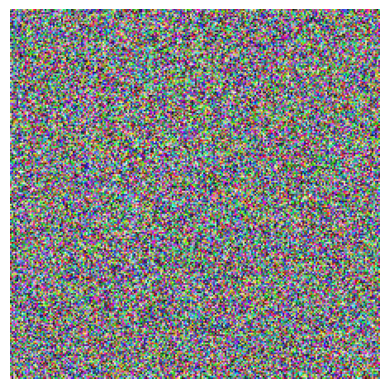

In [10]:
import matplotlib.pyplot as plt
plt.imshow(random_img_tensor.numpy())
plt.axis("off")  # remove the axis
plt.show()

### Zeros and ones

In [12]:
# create a tensor of all zeros
zeros_tensor = torch.zeros(size=(3,4))
print(zeros_tensor)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [14]:
zeros_tensor*random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [15]:
# create a trensor of all ones
ones_tensor = torch.ones(size=(3,4))
ones_tensor

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [16]:
ones_tensor.dtype

torch.float32

### create a range of tensors and tensors-like

In [19]:
one_to_ten = torch.arange(1, 11)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [18]:
torch.arange(start = 0, end = 100, step = 10)

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [20]:
torch.zeros_like(input=one_to_ten)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

**Note:** 3 commonly encountered error working with Pytorch Tensors:
* Common Error #1: Shape errors in PyTorch
* Common Error #2: Device errors in PyTorch
* Common Error #3: Datatype errors in PyTorch


In [ ]:
float_32_tensor = torch.tensor([3.0, 6.0, 9.0], 
                               dtype=None,   # torch.float32 | float64 | float16 | bfloat16 | int64 | bool
                               device=None,  # 'cpu' | 'cuda' | 'cuda:0' | 'mps'(Apple Silicon)
                               requires_grad=False)  # True=track gradients | False=do not track
print(float_32_tensor)
float_32_tensor.dtype

tensor([3., 6., 9.])


torch.float32

In [22]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

In [23]:
float_16_tensor*float_32_tensor

tensor([ 9., 36., 81.])

In [25]:
int_32_tensor = torch.tensor([3, 6, 9], dtype=torch.int32)
print(int_32_tensor)
int_32_tensor*float_32_tensor

tensor([3, 6, 9], dtype=torch.int32)


tensor([ 9., 36., 81.])

### Get information from tensors

In [26]:
some_tensor = torch.rand(3 ,4)
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Device of tensor in on: {some_tensor.device}")

Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device of tensor in on: cpu


### Manipulating Tensors

In [27]:
# tensor addition
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
# elemen-twise multiplication
tensor * 10

tensor([10, 20, 30])

In [30]:
# PyTorch in-built functions
print(torch.mul(tensor, 10))
print(torch.add(tensor, 10))

tensor([10, 20, 30])
tensor([11, 12, 13])


In [31]:
# Matrix Multiplication
torch.matmul(tensor, tensor)

tensor(14)

In [32]:
# unmatched inner dimmension would throw an error:
torch.matmul(torch.rand(3,2), torch.rand(3,2))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [33]:
torch.matmul(torch.rand(2,3), torch.rand(3,2))

tensor([[0.7857, 0.3951],
        [0.7664, 0.3049]])

In [34]:
torch.rand(2,3) @ torch.rand(3,2)

tensor([[0.8917, 1.1553],
        [0.7562, 1.0421]])

In [35]:
tensor_A = torch.tensor([[1,2],[3,4],[5,6]])
tensor_B = torch.tensor([[7,10],[8,11],[9,12]])
# transpose tensor B to match the dim
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])